In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,NaN,3.76820,NaN,3.99630,2.21730,3.90290,1.51440,2.43890,NaN
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,NaN,3.20140,NaN,1.52260,0.98475,3.10940,3.65640,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,NaN,3.29400,1.08500,NaN,NaN,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,NaN,2.99900,NaN,2.95160,NaN,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
float64		column 2	19
float64		column 3	12
float64		column 4	18
float64		column 5	6
float64		column 6	24
float64		column 7	12
float64		column 8	18
float64		column 9	24
float64		column 10	12
float64		column 11	37
float64		column 12	25


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,388.000000,381.000000,388.000000,382.000000,394.000000,376.000000,388.000000,382.000000,376.000000,388.000000,363.000000,375.000000
mean,-0.092131,0.074731,2.032753,1.903070,1.925483,1.971103,2.014973,1.978510,1.956535,2.027295,1.977670,1.990217
std,2.578922,2.764736,1.137980,1.143514,1.158495,1.137717,1.155649,1.135939,1.149827,1.163570,1.156596,1.185636
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.030430,0.001972
25%,-0.707635,-0.816790,1.119050,0.945820,0.878337,1.044075,0.982585,1.030050,0.983505,1.020125,0.922670,0.982440
50%,-0.046671,0.021200,2.086550,1.786250,1.906950,2.021800,2.098100,1.966950,2.067200,2.082700,1.920700,1.939900
75%,0.774360,0.887650,2.989725,2.822825,2.937025,2.960125,2.958150,3.011725,2.910950,3.062225,2.982650,3.022650
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

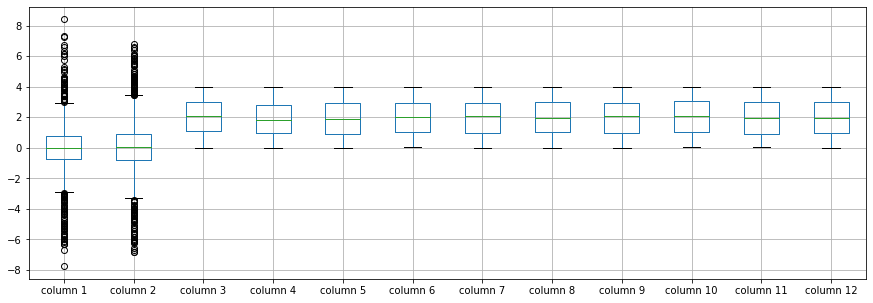

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.092131
column 2     0.074731
column 3     2.032753
column 4     1.903070
column 5     1.925483
column 6     1.971103
column 7     2.014973
column 8     1.978510
column 9     1.956535
column 10    2.027295
column 11    1.977670
column 12    1.990217
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.008121,-0.053118,-0.080934,-0.010064,-0.023772,-0.017557,0.026380,-0.029912,0.043638,0.061590,-0.018576
column 2,0.008121,1.000000,-0.035813,0.029674,-0.053095,-0.056979,-0.003199,-0.044884,-0.009009,0.003879,-0.048822,0.072203
column 3,-0.053118,-0.035813,1.000000,-0.003204,-0.023325,-0.078125,-0.080189,0.072128,0.117961,-0.012714,-0.060478,-0.006328
column 4,-0.080934,0.029674,-0.003204,1.000000,-0.007934,0.090653,0.007317,0.079822,-0.006738,0.079779,-0.007102,-0.067345
column 5,-0.010064,-0.053095,-0.023325,-0.007934,1.000000,0.054873,0.010339,0.008778,-0.005168,0.021556,-0.004804,-0.016193
column 6,-0.023772,-0.056979,-0.078125,0.090653,0.054873,1.000000,0.018600,0.069075,0.000030,-0.004473,0.015703,-0.023955
column 7,-0.017557,-0.003199,-0.080189,0.007317,0.010339,0.018600,1.000000,-0.030463,0.064978,0.043113,0.036284,-0.064463
column 8,0.026380,-0.044884,0.072128,0.079822,0.008778,0.069075,-0.030463,1.000000,0.040865,-0.155664,-0.037748,0.002387
column 9,-0.029912,-0.009009,0.117961,-0.006738,-0.005168,0.000030,0.064978,0.040865,1.000000,-0.010428,0.004800,0.088611
column 10,0.043638,0.003879,-0.012714,0.079779,0.021556,-0.004473,0.043113,-0.155664,-0.010428,1.000000,0.009688,0.022539


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+66,12+66+66,12+66+66+66,12+66+66+66+66,12+66+66+66+66+66,12+66+66+66+66+66+66,12+66+66+66+66+66,12+66+66+66+66,12+66+66+66,12+66+66,12+66,12], vae_layer = False, seed = 66)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.652820892333985
Epoch: 1 , loss: 26.57682113647461
Epoch: 2 , loss: 26.432595291137694
Epoch: 3 , loss: 25.551025466918944
Epoch: 4 , loss: 23.288000335693358
Epoch: 5 , loss: 22.567579345703123
Epoch: 6 , loss: 22.175892791748048
Epoch: 7 , loss: 21.86103973388672
Epoch: 8 , loss: 21.54690002441406
Epoch: 9 , loss: 21.12719451904297
Epoch: 10 , loss: 21.162128372192385
Epoch: 11 , loss: 20.858247528076173
Epoch: 12 , loss: 20.40438362121582
Epoch: 13 , loss: 20.445816345214844
Epoch: 14 , loss: 20.449850006103517
Epoch: 15 , loss: 20.016328353881836
Epoch: 16 , loss: 19.608962326049806
Epoch: 17 , loss: 19.569851303100585
Epoch: 18 , loss: 19.651618881225588
Epoch: 19 , loss: 19.3981787109375
Epoch: 20 , loss: 19.140881805419923
Epoch: 21 , loss: 19.32595329284668
Epoch: 22 , loss: 19.046847496032715
Epoch: 23 , loss: 18.642700881958007
Epoch: 24 , loss: 18.98779655456543
Epoch: 25 , loss: 18.44337

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
2,0.0,0.0,0.0,-0.576914,0.0,-0.458804,0.000000,0.000000,0.0,0.000000,0.00000,0.132122
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
4,0.0,0.0,0.0,-0.737737,0.0,-2.553838,0.000000,0.000000,0.0,0.000000,0.00000,-0.079808
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.000000,0.0,0.000000,0.605401,0.000000,0.0,2.137113,1.70543,0.000000
396,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
397,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
398,0.0,0.0,0.0,1.793155,0.0,-1.217742,0.000000,1.891055,0.0,0.000000,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(23.94764807063104, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.14667111023684817

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.836300,2.88660,2.469600,0.215410,3.090000,0.78343,0.510350,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.434300,3.12990,1.277800,1.428500,0.143330,1.19480,2.131800,0.98473,3.844500
2,-1.115400,0.217560,1.61050,0.760186,3.76820,0.751196,3.996300,2.217300,3.90290,1.514400,2.43890,0.765702
3,-0.539160,-0.061874,0.36486,0.332780,0.19027,0.567160,1.660100,2.352700,0.66126,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,0.823863,3.20140,0.823562,1.522600,0.984750,3.10940,3.656400,3.91720,0.867252
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.704800,0.88269,0.354060,2.233201,3.294000,1.08500,2.294513,2.17047,2.851400
396,0.264630,-6.107600,3.90540,1.337700,1.41870,1.686100,1.095100,3.793600,0.12790,0.542490,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.772100,2.55090,1.470100,0.925400,1.841100,3.47730,0.954960,1.52630,2.123800
398,7.293000,-0.411470,2.49480,2.189705,2.99900,2.192358,2.951600,2.169055,0.99059,3.437400,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AE_5(imp).xlsx", index=False, header=False)